In [1]:
import numpy as np

def neville_interpolation(x_points, y_points, x):
    """
    Perform Neville's interpolation for a given set of data points and return the interpolated value
    and the entire Q matrix.

    Parameters:
    x_points : array-like
        The x-coordinates of the data points.
    y_points : array-like
        The y-coordinates of the data points.
    x : float
        The point at which to evaluate the interpolating polynomial.

    Returns:
    float, numpy.ndarray
        The interpolated value at x and the entire Q matrix.
    """
    n = len(x_points)
    Q = np.zeros((n, n))

    # Initialize the first column with the y-values
    for i in range(n):
        Q[i, 0] = y_points[i]
    # Step 1
    # Fill the table using the recursive formula
    for j in range(1, n):
        for i in range(n - j):
            Q[i, j] = ((x - x_points[i + j]) * Q[i, j - 1] - (x - x_points[i]) * Q[i + 1, j - 1]) / (x_points[i] - x_points[i + j])

    # Step 2
    # The interpolated value is the top of the last column
    return Q[0, n - 1], Q

# Example usage
x_points = [8.1, 8.3, 8.6, 8.7]
y_points = [16.94410, 17.56492, 18.50515, 18.82091]
x = 8.4

interpolated_value, Q_matrix = neville_interpolation(x_points, y_points, x)
print(f"The interpolated value at x = {x} is: {interpolated_value}")
print("\nThe Q matrix is:")
print(Q_matrix)

The interpolated value at x = 8.4 is: 17.877142500000005

The Q matrix is:
[[16.9441    17.87533   17.87713   17.8771425]
 [17.56492   17.87833   17.877155   0.       ]
 [18.50515   17.87363    0.         0.       ]
 [18.82091    0.         0.         0.       ]]


In [5]:
import numpy as np

def divided_differences(x_points, y_points):
    """
    Calculate the divided differences table.

    Parameters:
    x_points : array-like
        The x-coordinates of the data points.
    y_points : array-like
        The y-coordinates of the data points.

    Returns:
    numpy.ndarray
        The divided differences table.
    """
    n = len(x_points)
    coef = np.zeros([n, n])
    coef[:,0] = y_points

    # Step 1 
    for j in range(1, n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_points[i+j] - x_points[i])

    # Step 2
    return coef[0]

def newton_polynomial_and_approximation(x_points, y_points, x_val):
    """
    Generate the Newton polynomial and calculate the approximation at a given x.

    Parameters:
    x_points : array-like
        The x-coordinates of the data points.
    y_points : array-like
        The y-coordinates of the data points.
    x_val : float
        The value of x at which to calculate the polynomial's approximation.

    Returns:
    str, float
        The Newton polynomial as a string and the approximated value at x_val.
    """
    coef = divided_differences(x_points, y_points)
    n = len(x_points)
    polynomial = f"{coef[0]}"
    approximation = coef[0]
    
    for i in range(1, n):
        term = f"{coef[i]:+}"
        term_value = coef[i]
        for j in range(i):
            term += f"*(x-{x_points[j]})"
            term_value *= (x_val - x_points[j])
        polynomial += f" {term}"
        approximation += term_value
    
    return polynomial, approximation

# Example usage
x_points = [8.1, 8.3, 8.6, 8.7]
y_points = [16.94410, 17.56492, 18.50515, 18.82091]
x_val = 8.4

polynomial, approximation = newton_polynomial_and_approximation(x_points, y_points, x_val)
print(f"The Newton polynomial is:\nP(x) = {polynomial}")
print(f"The approximation at x = {x_val} is: {approximation}")

The Newton polynomial is:
P(x) = 16.9441 +3.104099999999993*(x-8.1) +0.06000000000003336*(x-8.1)*(x-8.3) -0.0020833333333447855*(x-8.1)*(x-8.3)*(x-8.6)
The approximation at x = 8.4 is: 17.877142499999998


In [14]:
import numpy as np

def divided_differences(x_points, y_points, dy_points=None):
    """
    Calculate the divided differences table for Hermite interpolation.

    Parameters:
    x_points : array-like
        The x-coordinates of the data points.
    y_points : array-like
        The y-coordinates of the data points.
    dy_points : array-like, optional
        The derivatives at the data points. If None, standard divided differences are calculated.

    Returns:
    numpy.ndarray
        The divided differences table.
    """
    n = len(x_points)
    Q = np.zeros((2 * n, 2 * n))
    z = np.zeros(2 * n)
    f_prime = np.zeros(2 * n)
    
    # Double the points for Hermite interpolation
    # Step 1
    for i in range(n):
        # Step 2 
        z[2 * i] = z[2 * i + 1] = x_points[i]
        Q[2 * i][0] = Q[2 * i + 1][0] = y_points[i]
        f_prime[2 * i] = f_prime[2 * i + 1] = dy_points[i] if dy_points is not None else 0
        Q[2 * i + 1][1] = dy_points[i] if dy_points is not None else 0

        # Step 3
        if i != 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])
    
    # Calculate the remaining divided differences
    # Step 4
    for j in range(2, 2 * n):
        for i in range(2 * n - j):
            Q[i][j] = (Q[i + 1][j - 1] - Q[i][j - 1]) / (z[i + j] - z[i])

    # Step 5
    return Q[0], z

def hermite_polynomial_and_approximation(x_points, y_points, dy_points, x_val):
    """
    Generate the Hermite polynomial and calculate the approximation at a given x.

    Parameters:
    x_points : array-like
        The x-coordinates of the data points.
    y_points : array-like
        The y-coordinates of the data points.
    dy_points : array-like
        The derivatives at the data points.
    x_val : float
        The value of x at which to calculate the polynomial's approximation.

    Returns:
    str, float
        The Hermite polynomial as a string and the approximated value at x_val.
    """
    coef, z = divided_differences(x_points, y_points, dy_points)
    n = len(x_points)
    polynomial = f"{coef[0]}"
    approximation = coef[0]
    
    for i in range(1, 2 * n):
        term = f"{coef[i]:+}"
        term_value = coef[i]
        for j in range(i):
            term += f"*(x-{z[j]})"
            term_value *= (x_val - z[j])
        polynomial += f" {term}"
        approximation += term_value
    
    return polynomial, approximation

# Example usage
x_points = [8.3, 8.6]
y_points = [17.56492, 18.50515]
dy_points = [3.116256, 3.151762]  # Derivatives at each x-point
x_val = 8.4

polynomial, approximation = hermite_polynomial_and_approximation(x_points, y_points, dy_points, x_val)
print(f"The Hermite polynomial is:\nH(x) = {polynomial}")
print(f"The approximation at x = {x_val} is: {approximation}")


The Hermite polynomial is:
H(x) = 17.56492 +0.0*(x-8.3) +10.387520000000036*(x-8.3)*(x-8.3) -34.426800000000135*(x-8.3)*(x-8.3)*(x-8.6)
The approximation at x = 8.4 is: 17.737648800000002


In [18]:
import numpy as np

def natural_cubic_spline(x_points, y_points):
    """
    Calculate the coefficients for the natural cubic spline.

    Parameters:
    x_points : array-like
        The x-coordinates of the data points.
    y_points : array-like
        The y-coordinates of the data points.

    Returns:
    list of tuples
        A list where each tuple contains the coefficients (a, b, c, d) for the cubic spline segments.
    """
    n = len(x_points) - 1
    # Step 1
    h = np.diff(x_points)
    alpha = np.zeros(n)

    # Step 2
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (y_points[i+1] - y_points[i]) - (3/h[i-1]) * (y_points[i] - y_points[i-1])

    # Step 3
    l = np.ones(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)

    # Step 4
    for i in range(1, n):
        l[i] = 2 * (x_points[i+1] - x_points[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    # Step 5
    l[n] = 1
    z[n] = 0
    c = np.zeros(n+1)
    b = np.zeros(n)
    d = np.zeros(n)
    a = np.zeros(n)

    # Step 6
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (y_points[j+1] - y_points[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
        a[j] = y_points[j]
    
    # Return coefficients for each spline segment
    # Step 7
    return [(a[i], b[i], c[i], d[i]) for i in range(n)]

def evaluate_spline(coefficients, x_points, x_val):
    """
    Evaluate the natural cubic spline at a given x.

    Parameters:
    coefficients : list of tuples
        The list of coefficients (a, b, c, d) for the cubic spline segments.
    x_points : array-like
        The x-coordinates of the data points.
    x_val : float
        The x-value at which to evaluate the spline.

    Returns:
    float
        The interpolated value at x_val.
    """
    n = len(x_points) - 1
    for i in range(n):
        if x_points[i] <= x_val <= x_points[i+1]:
            a, b, c, d = coefficients[i]
            dx = x_val - x_points[i]
            return a + b * dx + c * dx**2 + d * dx**3
    return None  # If x_val is out of the range of x_points

# Example usage
x_points = [0, 1, 2]
y_points = [0, 1, 2]
x_val = 0.5

coefficients = natural_cubic_spline(x_points, y_points)
approximation = evaluate_spline(coefficients, x_points, x_val)

print("Spline coefficients for each segment:")
for i, (a, b, c, d) in enumerate(coefficients):
    print(f"Spline segment {i}: a={a}, b={b}, c={c}, d={d}")

print(f"\nThe approximation at x = {x_val} is: {approximation}")


Spline coefficients for each segment:
Spline segment 0: a=0.0, b=1.0, c=0.0, d=0.0
Spline segment 1: a=1.0, b=1.0, c=0.0, d=0.0

The approximation at x = 0.5 is: 0.5


In [20]:
import numpy as np

def clamped_cubic_spline(x_points, y_points, fpa, fpb):
    """
    Calculate the coefficients for the clamped cubic spline.

    Parameters:
    x_points : array-like
        The x-coordinates of the data points.
    y_points : array-like
        The y-coordinates of the data points.
    fpa : float
        The derivative at the first point (clamped condition).
    fpb : float
        The derivative at the last point (clamped condition).

    Returns:
    list of tuples
        A list where each tuple contains the coefficients (a, b, c, d) for the cubic spline segments.
    """
    n = len(x_points) - 1

    # Step 1
    h = np.diff(x_points)
    alpha = np.zeros(n+1)

    # Step 2
    alpha[0] = (3 * (y_points[1] - y_points[0]) / h[0]) - 3 * fpa
    alpha[n] = 3 * fpb - (3 * (y_points[n] - y_points[n-1]) / h[n-1])

    # Step 3
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (y_points[i+1] - y_points[i]) - (3/h[i-1]) * (y_points[i] - y_points[i-1])

    # Step 4
    l = np.ones(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)
    
    l[0] = 2 * h[0]
    mu[0] = 0.5
    z[0] = alpha[0] / l[0]

    # Step 5
    for i in range(1, n):
        l[i] = 2 * (x_points[i+1] - x_points[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
    # Step 6
    l[n] = h[n-1] * (2 - mu[n-1])
    z[n] = (alpha[n] - h[n-1] * z[n-1]) / l[n]
    
    c = np.zeros(n+1)
    b = np.zeros(n)
    d = np.zeros(n)
    a = np.zeros(n)
    
    c[n] = z[n]

    # Step 7
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (y_points[j+1] - y_points[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
        a[j] = y_points[j]

    # Step 8
    return [(a[i], b[i], c[i], d[i]) for i in range(n)]

def evaluate_spline(coefficients, x_points, x_val):
    """
    Evaluate the clamped cubic spline at a given x.

    Parameters:
    coefficients : list of tuples
        The list of coefficients (a, b, c, d) for the cubic spline segments.
    x_points : array-like
        The x-coordinates of the data points.
    x_val : float
        The x-value at which to evaluate the spline.

    Returns:
    float
        The interpolated value at x_val.
    """
    n = len(x_points) - 1
    for i in range(n):
        if x_points[i] <= x_val <= x_points[i+1]:
            a, b, c, d = coefficients[i]
            dx = x_val - x_points[i]
            return a + b * dx + c * dx**2 + d * dx**3
    return None  # If x_val is out of the range of x_points

# Example usage
x_points = [0, 1, 2]
y_points = [0, 1, 2]
fpa = 1  # Derivative at the first point
fpb = 1  # Derivative at the last point
x_val = 0.5

coefficients = clamped_cubic_spline(x_points, y_points, fpa, fpb)
approximation = evaluate_spline(coefficients, x_points, x_val)

print("Spline coefficients for each segment:")
for i, (a, b, c, d) in enumerate(coefficients):
    print(f"Spline segment {i}: a={a}, b={b}, c={c}, d={d}")

print(f"\nThe approximation at x = {x_val} is: {approximation}")


Spline coefficients for each segment:
Spline segment 0: a=0.0, b=1.0, c=0.0, d=0.0
Spline segment 1: a=1.0, b=1.0, c=0.0, d=0.0

The approximation at x = 0.5 is: 0.5


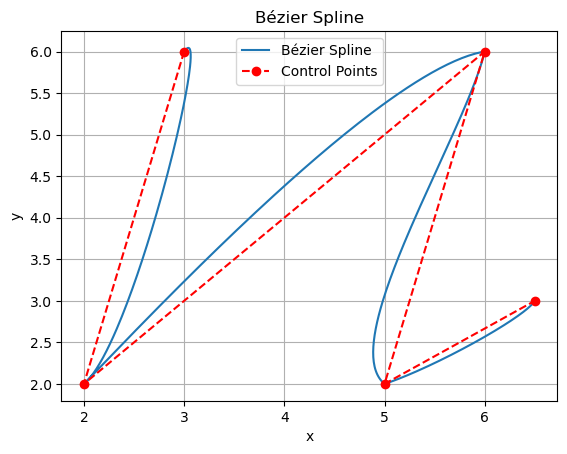

In [135]:
import numpy as np
import matplotlib.pyplot as plt

def bezier_curve_coefficients(points, left_guidepoints, right_guidepoints):
    """
    Calculate the coefficient on a cubic Bézier curve.

    Parameters:
    points, left_guidepoints, right_guidepoints : tuple
    num_points : int
        The number of points to calculate on the Bézier curve.

    Returns:
    numpy.ndarray
        The coefficients of a cubic Bézier curve.
    """

    n = len(points)
    a0 = []
    a1 = []
    a2 = []
    a3 = []
    b0 = []
    b1 = []
    b2 = []
    b3 = []
    
    for i in range(0, n - 1):
        a0.append(points[i][0])
        b0.append(points[i][1])
        a1.append(3*(left_guidepoints[i][0] - points[i][0]))
        b1.append(3*(left_guidepoints[i][1] - points[i][1]))
        a2.append(3*(points[i][0] + right_guidepoints[i][0] - 2 * left_guidepoints[i][0]))
        b2.append(3*(points[i][1] + right_guidepoints[i][1] - 2 * left_guidepoints[i][1]))
        a3.append(points[i+1][0] - points[i][0] + 3 * left_guidepoints[i][0] - 3 * right_guidepoints[i][0])
        b3.append(points[i+1][1] - points[i][1] + 3 * left_guidepoints[i][1] - 3 * right_guidepoints[i][1])
    return a0, a1, a2, a3, b0, b1, b2, b3    

# Example usage
points = [(3, 6), (2, 2), (6, 6), (5,2), (6.5, 3)]
left_guidepoints = [(3.3, 6.5), (2.8, 3), (5.8, 5), (5.5, 2.2)]
right_guidepoints = [(2.5, 2.5), (5, 5.8), (4.5, 2.5), (6.4, 2.8)]

a0, a1, a2, a3, b0, b1, b2, b3 = bezier_curve_coefficients(points, left_guidepoints, right_guidepoints)

m = len(a0)
t = np.linspace(0,1,100)
x_points = a0[0] + a1[0] * t + a2[0] * t**2 + a3[0] * t**3
y_points = b0[0] + b1[0] * t + b2[0] * t**2 + b3[0] * t**3

for i in range(1, m):
    x_spline = a0[i] + a1[i] * t + a2[i] * t**2 + a3[i] * t**3
    y_spline = b0[i] + b1[i] * t + b2[i] * t**2 + b3[i] * t**3
    x_points = np.concatenate((x_points,x_spline))
    y_points = np.concatenate((y_points,y_spline))

plt.plot(x_points, y_points, label="Bézier Spline")
plt.plot(*zip(*points), 'ro--', label="Control Points")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bézier Spline')
plt.grid(True)
plt.show()